In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes,svm
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix,classification_report

%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
train = pd.read_csv("https://raw.githubusercontent.com/T-I-P/Hope-Speech-Detection/master/English/train_tokenized.csv")
test = pd.read_csv("https://raw.githubusercontent.com/T-I-P/Hope-Speech-Detection/master/English/valid_tokenized.csv")

In [3]:
train.head()

,Unnamed: 0,text,intent,text_final
0,0,"['these', 'tiktok', 'radiate', 'gay', 'chaotic...",Non_hope_speech,"['tiktok', 'radiate', 'gay', 'chaotic', 'energ..."
1,1,"['again', 'he', 'get', 'kill', 'for', 'use', '...",Non_hope_speech,"['get', 'kill', 'use', 'false', 'money']"
2,2,"['it', 'be', 'not', 'that', 'all', 'life', 'do...",Non_hope_speech,"['life', 'matter']"
3,3,"['be', 'it', 'really', 'that', 'difficult', 't...",Non_hope_speech,"['really', 'difficult', 'understand', 'black',..."
4,4,"['whenever', 'we', 'say', 'black', 'be', 'not'...",Non_hope_speech,"['whenever', 'say', 'black', 'racist', 'say', ..."


In [4]:
train = train.drop('Unnamed: 0', axis=1)
test = test.drop('Unnamed: 0',axis =1)

In [5]:
Test_X = test['text_final']
Test_Y = test['intent']

In [6]:
Train_X, Valid_X, Train_Y, Valid_Y = model_selection.train_test_split(train['text_final'],train['intent'],test_size=0.3)

In [7]:
Train_Y = Train_Y.replace(to_replace ="Non_hope_speech", value =0)
Train_Y = Train_Y.replace(to_replace ="Hope_speech", value =1)
Train_Y.unique()

Test_Y = Test_Y.replace(to_replace ="Non_hope_speech", value =0)
Test_Y = Test_Y.replace(to_replace ="Hope_speech", value =1)
Train_Y.unique()

Valid_Y = Valid_Y.replace(to_replace ="Non_hope_speech", value =0)
Valid_Y = Valid_Y.replace(to_replace ="Hope_speech", value =1)
Valid_Y.unique()

array([0, 1])

In [8]:
# Other method for doing operations done in above 1 cell
# can use either of them
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Valid_Y = Encoder.fit_transform(Valid_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [9]:
#Tokenization 
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(train['text_final'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)
Valid_X_Tfidf = Tfidf_vect.transform(Valid_X)

In [10]:
print(Tfidf_vect.vocabulary_)

{'radiate': 3617, 'gay': 1835, 'chaotic': 742, 'energy': 1478, 'love': 2671, 'get': 1861, 'kill': 2485, 'use': 4702, 'false': 1628, 'money': 2909, 'life': 2602, 'matter': 2766, 'really': 3656, 'difficult': 1248, 'understand': 4656, 'black': 497, 'live': 2627, 'exclusive': 1575, 'true': 4598, 'general': 1844, 'statement': 4230, 'white': 4851, 'asian': 290, 'context': 954, 'simply': 4068, 'name': 2975, 'movement': 2938, 'high': 2069, 'rate': 3639, 'police': 3419, 'violence': 4751, 'people': 3317, 'refer': 3675, 'behave': 437, 'like': 2608, 'treat': 4577, 'example': 1567, 'whenever': 4842, 'say': 3891, 'racist': 3615, 'american': 171, 'bos': 557, 'donat': 1337, 'know': 2504, 'shea': 4009, 'actually': 61, 'lgbtq': 2591, 'tho': 4472, 'funny': 1810, 'end': 1474, 'larry': 2529, 'argue': 256, 'haha': 1969, 'save': 3885, 'music': 2961, 'lot': 2664, 'army': 263, 'unit': 4672, 'network': 3027, 'engineer': 1483, 'currently': 1075, 'work': 4912, 'teach': 4402, 'man': 2712, 'woman': 4903, 'look': 26

In [11]:
print(Train_X_Tfidf)

  (0, 2525)	0.6913878400558549
  (0, 1219)	0.7224838092462
  (1, 4916)	0.1413120772252552
  (1, 4702)	0.15245540326160795
  (1, 4471)	0.23693960111752063
  (1, 3940)	0.1296116505848527
  (1, 3699)	0.2487410551657768
  (1, 1631)	0.17465090602716102
  (1, 1626)	0.20001835236445514
  (1, 1548)	0.1515812845049655
  (1, 1313)	0.1928048411613265
  (1, 1013)	0.15023510391241776
  (1, 864)	0.13482937317877453
  (1, 674)	0.25711432006737983
  (1, 497)	0.286169865419518
  (1, 171)	0.15505256169350734
  (1, 169)	0.6364236753076936
  (1, 147)	0.19956708802308307
  (1, 101)	0.18347147230914151
  (2, 3656)	0.41766404891608555
  (2, 2766)	0.276530593968202
  (2, 2285)	0.8654984534027863
  (3, 4939)	0.5802860057800638
  (3, 770)	0.5119010637086993
  (3, 601)	0.6334235963947994
  :	:
  (15896, 3317)	0.225877551351802
  (15896, 2608)	0.2614797886345492
  (15896, 2091)	0.391378721492773
  (15896, 712)	0.3985164799695352
  (15896, 598)	0.4816691253411529
  (15897, 4605)	0.3715047730919355
  (15897, 3567)	

**Naive Bayes**

In [15]:
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
predictions_NB = Naive.predict(Valid_X_Tfidf)
print("Naive Bayes Accuracy Score on valid set-> ",accuracy_score(predictions_NB, Valid_Y)*100)

Naive Bayes Accuracy Score on valid set->  91.37323943661971


In [16]:
# accuracy on test set
predictions_NB_T = Naive.predict(Test_X_Tfidf)
print("Naive Bayes Accuracy Score on test set-> ",accuracy_score(predictions_NB_T, Test_Y)*100)

Naive Bayes Accuracy Score on test set->  90.45438534695315


In [17]:
#Training set accuracy Naive bayes
predictions_NB_Tr = Naive.predict(Train_X_Tfidf)
print("Naive Bayes Accuracy Score on training set -> ",accuracy_score(predictions_NB_Tr, Train_Y)*100)

Naive Bayes Accuracy Score on training set ->  91.37215444598164


In [18]:
print ('\n*Classification Report: Naive bayes\n', classification_report(Test_Y, predictions_NB_T))
confusion_matrix(Test_Y, predictions_NB_T)


*Classification Report: Naive bayes
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      2568
           1       0.00      0.00      0.00       271

    accuracy                           0.90      2839
   macro avg       0.45      0.50      0.47      2839
weighted avg       0.82      0.90      0.86      2839



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[2568,    0],
       [ 271,    0]])

In [19]:
tn, fp, fn, tp = confusion_matrix(Test_Y, predictions_NB_T).ravel()
print(tn,fp,fn,tp)

2568 0 271 0


**SVM**

In [20]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
predictions_SVM = SVM.predict(Valid_X_Tfidf)
print("SVM Accuracy Score on valid set-> ",accuracy_score(predictions_SVM, Valid_Y)*100)

SVM Accuracy Score on valid set->  91.38791079812206


In [21]:
#accuracy on test set
predictions_SVM_T = SVM.predict(Test_X_Tfidf)
print("SVM Accuracy Score test set -> ",accuracy_score(predictions_SVM_T, Test_Y)*100)

SVM Accuracy Score test set ->  90.45438534695315


In [22]:
# Training set accuracy SVM
predictions_SVM_Tr = SVM.predict(Train_X_Tfidf)
print("SVM Accuracy Score on training set -> ",accuracy_score(predictions_SVM_Tr, Train_Y)*100)

SVM Accuracy Score on training set ->  91.36586592881399


In [23]:
print ('\n*Classification Report: SVM\n', classification_report(Test_Y, predictions_SVM_T))
confusion_matrix(Test_Y, predictions_SVM_T)


*Classification Report: SVM
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      2568
           1       0.00      0.00      0.00       271

    accuracy                           0.90      2839
   macro avg       0.45      0.50      0.47      2839
weighted avg       0.82      0.90      0.86      2839



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[2568,    0],
       [ 271,    0]])

In [24]:
tn, fp, fn, tp = confusion_matrix(Test_Y, predictions_SVM_T).ravel()
print(tn,fp,fn,tp)

2568 0 271 0


**Logistic Regression**

In [25]:
LR = LogisticRegression()
model = LR.fit(Train_X_Tfidf,Train_Y)
prediction_LR = model.predict(Valid_X_Tfidf)
print("Logistic Regression Accuracy Score on valid set-> ",accuracy_score(predictions_SVM, Valid_Y)*100)

Logistic Regression Accuracy Score on valid set->  91.38791079812206


In [26]:
#accuracy on test set
predictions_LR_T = model.predict(Test_X_Tfidf)
print("Logistic Regression Accuracy Score test set -> ",accuracy_score(predictions_LR_T, Test_Y)*100)

Logistic Regression Accuracy Score test set ->  90.45438534695315


In [27]:
# Training set accuracy SVM
predictions_LR_Tr = model.predict(Train_X_Tfidf)
print("Logistic Regression Accuracy Score on training set -> ",accuracy_score(predictions_LR_Tr, Train_Y)*100)

Logistic Regression Accuracy Score on training set ->  91.35957741164633


In [28]:
print ('\n*Classification Report: Logistic Regression\n', classification_report(Test_Y, predictions_LR_T))
confusion_matrix(Test_Y, predictions_SVM_T)


*Classification Report: Logistic Regression
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      2568
           1       0.00      0.00      0.00       271

    accuracy                           0.90      2839
   macro avg       0.45      0.50      0.47      2839
weighted avg       0.82      0.90      0.86      2839



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[2568,    0],
       [ 271,    0]])

In [29]:
tn, fp, fn, tp = confusion_matrix(Test_Y, predictions_LR_T).ravel()
print(tn,fp,fn,tp)

2568 0 271 0


**KNN**

In [13]:
lst_acc = []
lst_f1 = []
lst_recall = []
lst_prec = []
for i in range(1, 10):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(Train_X_Tfidf,Train_Y)
  y_pred = knn.predict(Test_X_Tfidf)
  acc = metrics.accuracy_score(Test_Y, y_pred)
  recall = metrics.recall_score(Test_Y, y_pred)
  precision = metrics.precision_score(Test_Y, y_pred)
  f1 = metrics.f1_score(Test_Y, y_pred)
  # cr = classification_report(Test_Y, y_pred)
  print("Accuracy: {:.4f}" .format(acc), "F1 Score: {:.4f}" .format(f1), "Precision: {:.4f}" .format(precision), "Recall: {:.4f}" .format(recall))
  #print(cr)
  #print("Confusion Matrix :" confusion_matrix(Test_Y, predictions_SVM_T))
  lst_acc.append(acc)
  lst_f1.append(f1)
  lst_prec.append(precision)
  lst_recall.append(recall)

Accuracy: 0.8665 F1 Score: 0.0779 Precision: 0.1143 Recall: 0.0590
Accuracy: 0.9028 F1 Score: 0.0000 Precision: 0.0000 Recall: 0.0000
Accuracy: 0.9000 F1 Score: 0.0000 Precision: 0.0000 Recall: 0.0000
Accuracy: 0.9017 F1 Score: 0.0000 Precision: 0.0000 Recall: 0.0000
Accuracy: 0.8986 F1 Score: 0.0069 Precision: 0.0526 Recall: 0.0037
Accuracy: 0.9042 F1 Score: 0.0000 Precision: 0.0000 Recall: 0.0000
Accuracy: 0.9028 F1 Score: 0.0000 Precision: 0.0000 Recall: 0.0000
Accuracy: 0.9042 F1 Score: 0.0000 Precision: 0.0000 Recall: 0.0000
Accuracy: 0.9042 F1 Score: 0.0000 Precision: 0.0000 Recall: 0.0000


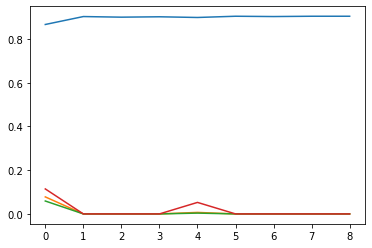

In [14]:
plt.plot(lst_acc)
plt.plot(lst_f1)
plt.plot(lst_recall)
plt.plot(lst_prec)
plt.show()